# Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("honeyproduction.csv")
data

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0      AL   16000.0           71   1136000.0    159000.0        0.72   
1      AZ   55000.0           60   3300000.0   1485000.0        0.64   
2      AR   53000.0           65   3445000.0   1688000.0        0.59   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
4      CO   27000.0           72   1944000.0   1594000.0        0.70   
..    ...       ...          ...         ...         ...         ...   
621    VA    4000.0           41    164000.0     23000.0        3.77   
622    WA   62000.0           41   2542000.0   1017000.0        2.38   
623    WV    6000.0           48    288000.0     95000.0        2.91   
624    WI   60000.0           69   4140000.0   1863000.0        2.05   
625    WY   50000.0           51   2550000.0    459000.0        1.87   

      prodvalue  year  
0      818000.0  1998  
1     2112000.0  1998  
2     2033000.0  1998  
3    23157000.0  1998  
4     1361000.0  1998  
..          ...   ...  
621    618000.0  2012  
622   6050000.0  2012  
623    838000.0  2012  
624   8487000.0  2012  
625   4769000.0  2012  

[626 rows x 8 columns]

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
data.head(10)

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   
5    FL  230000.0           98  22540000.0   4508000.0        0.64   
6    GA   75000.0           56   4200000.0    307000.0        0.69   
7    HI    8000.0          118    944000.0     66000.0        0.77   
8    ID  120000.0           50   6000000.0   2220000.0        0.65   
9    IL    9000.0           71    639000.0    204000.0        1.19   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
5  14426000.0  1998  
6   2898000.0  1998  
7    727000.0  1998  
8   3900000.0  1998  
9    760000.0  1998

In [4]:
data.tail(10)

state    numcol  yieldpercol   totalprod     stocks  priceperlb  \
616    SD  260000.0           63  16380000.0  3604000.0        1.95   
617    TN    6000.0           61    366000.0    59000.0        2.93   
618    TX   92000.0           52   4784000.0   718000.0        2.00   
619    UT   25000.0           38    950000.0   209000.0        1.87   
620    VT    4000.0           60    240000.0    53000.0        2.39   
621    VA    4000.0           41    164000.0    23000.0        3.77   
622    WA   62000.0           41   2542000.0  1017000.0        2.38   
623    WV    6000.0           48    288000.0    95000.0        2.91   
624    WI   60000.0           69   4140000.0  1863000.0        2.05   
625    WY   50000.0           51   2550000.0   459000.0        1.87   

      prodvalue  year  
616  31941000.0  2012  
617   1072000.0  2012  
618   9568000.0  2012  
619   1777000.0  2012  
620    574000.0  2012  
621    618000.0  2012  
622   6050000.0  2012  
623    838000.0  2012  
624   8487000.0  2012  
625   4769000.0  2012

In [5]:
data.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [6]:
data.shape

(626, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [8]:
data.describe(include="all").T

count unique  top freq            mean             std       min  \
state          626     44   AL   15             NaN             NaN       NaN   
numcol       626.0    NaN  NaN  NaN    60284.345048    91077.087231    2000.0   
yieldpercol  626.0    NaN  NaN  NaN       62.009585       19.458754      19.0   
totalprod    626.0    NaN  NaN  NaN  4169086.261981  6883846.751268   84000.0   
stocks       626.0    NaN  NaN  NaN   1318859.42492  2272963.665923    8000.0   
priceperlb   626.0    NaN  NaN  NaN        1.409569        0.638599      0.49   
prodvalue    626.0    NaN  NaN  NaN  4715741.214058   7976109.76856  162000.0   
year         626.0    NaN  NaN  NaN     2004.864217        4.317306    1998.0   

                  25%        50%        75%         max  
state             NaN        NaN        NaN         NaN  
numcol         9000.0    26000.0    63750.0    510000.0  
yieldpercol      48.0       60.0       74.0       136.0  
totalprod    475000.0  1533000.0  4175250.0  46410000.0  
stocks       143000.0   439500.0  1489500.0  13800000.0  
priceperlb     0.9325       1.36       1.68        4.15  
prodvalue    759250.0  1841500.0  4703250.0  69615000.0  
year           2001.0     2005.0     2009.0      2012.0

3. Display the percentage distribution of the data in each year using the pie chart.


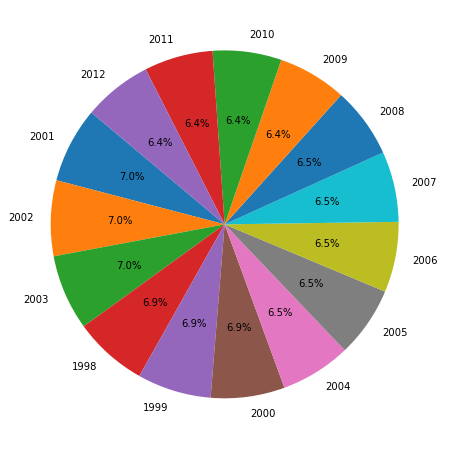

In [10]:
year_counts = data['year'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

In [13]:
data['year'].value_counts()

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


<AxesSubplot:xlabel='priceperlb', ylabel='Density'>

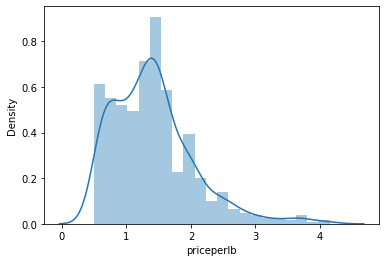

In [11]:
sns.distplot(data["priceperlb"])

The frequency of priceperlb at 1.5 is high and it is positively skewed

5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.


<AxesSubplot:xlabel='numcol', ylabel='prodvalue'>

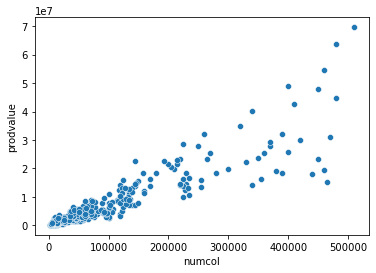

In [22]:
sns.scatterplot(data=data,x="numcol",y="prodvalue")

The relationship between numcol and prodvalue is positive.
Here the graph shows as the number of colonies increases the productive value also increase.

6. Plot and understand the relationship between categorical variable 'year' and a numerical variable
'prodvalue' through boxplot, and write your findings.

In [32]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data,x="year",y="prodvalue")

<AxesSubplot:xlabel='year', ylabel='prodvalue'>

Here almost median is same for all the year of honey production.Most of the year's are positively skewed.And we can observe the outlier's for each year.

7. Visualize and understand the relationship between the multiple pairs of variables throughout different years
using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


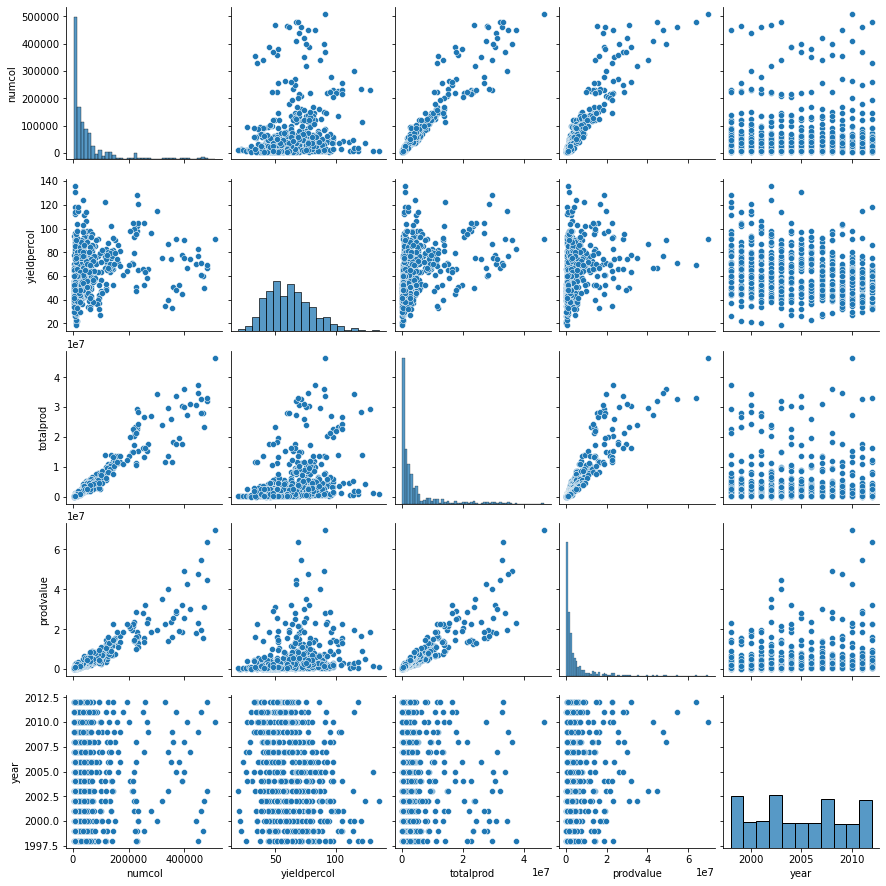

In [12]:
sns.pairplot(data = data, vars = ['numcol','yieldpercol','totalprod','prodvalue','year'])

Pairplot shows the relationship between every numeric variable with every other numeric variable.

8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
'total prod', 'stocks', 'price per lb', 'prodvalue'

In [44]:
corr=data.corr()

In [45]:
corr

numcol  yieldpercol  totalprod    stocks  priceperlb  \
numcol       1.000000     0.243515   0.953594  0.825929   -0.232701   
yieldpercol  0.243515     1.000000   0.396252  0.367812   -0.358646   
totalprod    0.953594     0.396252   1.000000  0.878830   -0.264499   
stocks       0.825929     0.367812   0.878830  1.000000   -0.305867   
priceperlb  -0.232701    -0.358646  -0.264499 -0.305867    1.000000   
prodvalue    0.912796     0.278977   0.907236  0.728560   -0.089567   
year         0.008709    -0.232092  -0.055556 -0.119602    0.693984   
Percentage   0.008709    -0.232092  -0.055556 -0.119602    0.693984   

             prodvalue      year  Percentage  
numcol        0.912796  0.008709    0.008709  
yieldpercol   0.278977 -0.232092   -0.232092  
totalprod     0.907236 -0.055556   -0.055556  
stocks        0.728560 -0.119602   -0.119602  
priceperlb   -0.089567  0.693984    0.693984  
prodvalue     1.000000  0.139451    0.139451  
year          0.139451  1.000000    1.000000  
Percentage    0.139451  1.000000    1.000000

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(data = corr, annot = True, cmap = "Blues")

<AxesSubplot:>

In [ ]:
The height correlation is between "totalprod" and "prodvalue".
The lowest correlation is between "priceperlb" and "yieldpercol"